In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
url_train = r'E:\DataSets\Traffic Sign\Traffic_Sign - 205 classes (GTSRB+162 custom classes)\Train'
url_test = r'E:\DataSets\Traffic Sign\Traffic_Sign - 205 classes (GTSRB+162 custom classes)\Test'
url_test_labels = r'E:\DataSets\Traffic Sign\Traffic_Sign - 205 classes (GTSRB+162 custom classes)\Test_labels.csv'

## 1. Analysis of data on the number of images for classes

### 1.1. Train Data

Minimum quantities images for one class (in Train Data): 173
Classes with minimum quantities images: 
Index([ 56,  57,  58,  61,  62,  63,  66,  67,  70,  71,  72,  74,  75,  76,
        77,  82,  83,  84,  85,  86,  97,  98, 104, 106, 121, 122, 123, 127,
       128, 145, 148, 160, 166, 173, 174, 177, 179, 180, 191, 193, 194, 195,
       196, 198, 200, 202],
      dtype='int64')


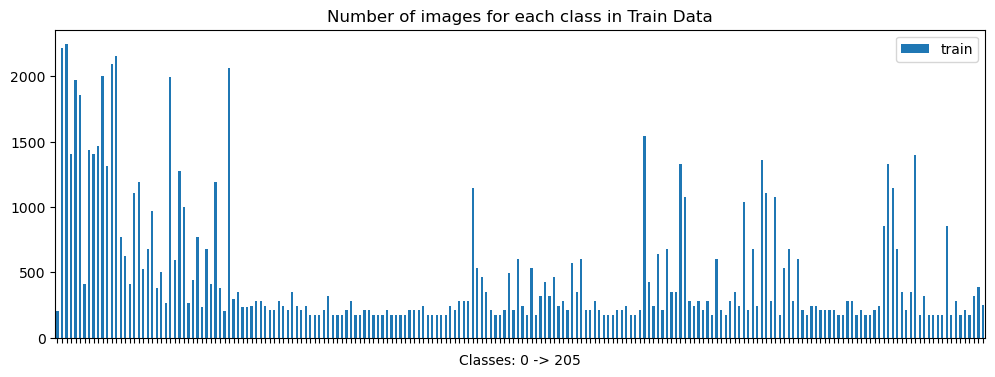

In [113]:
# Create dictionary with quantities for each class (for train data)
train_class_dict = {}
for dir in os.listdir(url_train):
    dir_path = os.path.join(url_train, dir)
    train_class_dict[int(dir)] = len(os.listdir(dir_path))

# Creat DataFrame
df_train = pd.DataFrame.from_dict(train_class_dict, orient='index', columns=['train'])
df_train.sort_index(inplace=True)
print(f'Minimum quantities images for one class (in Train Data): {df_train.train.min()}')
print(f'Classes with minimum quantities images: \n{df_train.index[df_train.train==df_train.train.min()]}')

# Plot with number of images for each class in Train Data
ax = df_train.plot(kind='bar', figsize=(12, 4), title='Number of images for each class in Train Data')
ax.set_xticklabels([])
ax.set_xlabel('Classes: 0 -> 205')
plt.show()

In [134]:
# Classes with min number samples (173)
df_train[df_train.train == 173].index

Index([ 56,  57,  58,  61,  62,  63,  66,  67,  70,  71,  72,  74,  75,  76,
        77,  82,  83,  84,  85,  86,  97,  98, 104, 106, 121, 122, 123, 127,
       128, 145, 148, 160, 166, 173, 174, 177, 179, 180, 191, 193, 194, 195,
       196, 198, 200, 202],
      dtype='int64')

#### The minimum quantities images for one class (in Train Data): 173 images (and the same value for most of the classes).

### 1.2. Test Data

Minimum quantities images for one class (in Test Data): 60
Classes with minimum quantities images: 
Index([0, 19, 27, 32, 37, 41], dtype='int64', name='ClassId')


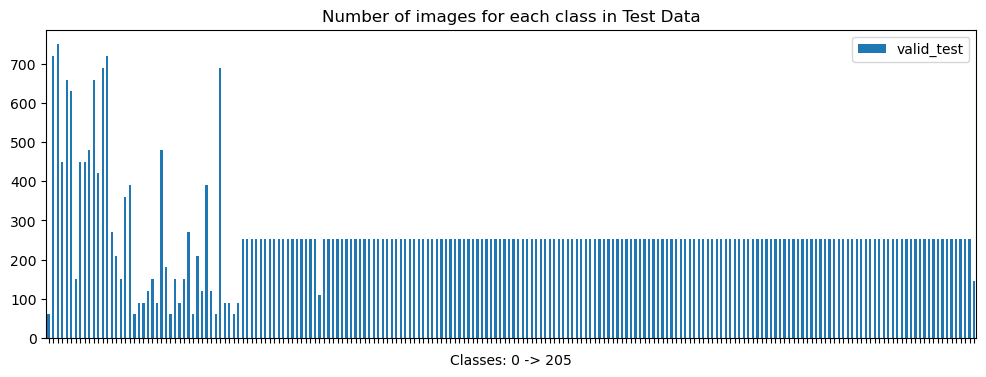

In [114]:
# Create a df with quantities for each class (for test data)
test_labels_df = pd.read_csv(url_test_labels)
test_labels_df['ClassId'] = test_labels_df['ClassId']

df_test = pd.DataFrame(test_labels_df.ClassId.value_counts())
df_test.rename({'count':'valid_test'}, axis=1, inplace=True)
df_test.sort_index(inplace=True)
print(f'Minimum quantities images for one class (in Test Data): {df_test.valid_test.min()}')
print(f'Classes with minimum quantities images: \n{df_test.index[df_test.valid_test==df_test.valid_test.min()]}')

# Plot with number of images for each class in Test Data
ax = df_test.plot(kind='bar', figsize=(12, 4), title='Number of images for each class in Test Data')
ax.set_xticklabels([])
ax.set_xlabel('Classes: 0 -> 205')
plt.show()

In [124]:
# Classes with less than 100 samples
list(df_test.valid_test[df_test.valid_test < 100].index)

[0, 19, 20, 21, 24, 27, 29, 32, 37, 39, 40, 41, 42]

#### The minimum quantities images for one class (in Test Data): 60 images. (and for most classes - 256 images)

## 2. Analisis of data by size images

### 2.1. Train Data

In [84]:
# Create list with minimum size for all images
img_sizes = []
for dir_name in os.listdir(url_train):
    url_dir = os.path.join(url_train, dir_name)
    for file in os.listdir(url_dir):
        url_img = os.path.join(url_dir, file)
        img = mpimg.imread(url_img)
        img_shape = img.shape[:2]
        img_sizes.append(img_shape)

In [107]:
train_images_df = pd.DataFrame(img_sizes, columns=['height', 'width'])
train_images_df['min_size'] = train_images_df[['height', 'width']].min(axis=1)
train_images_df.head()

,height,width,min_size
0,30,29,29
1,30,30,30
2,30,30,30
3,31,31,31
4,32,30,30


<Axes: title={'center': 'Number of images for Top-100 min_sizes (Train Data)'}, xlabel='min_size'>

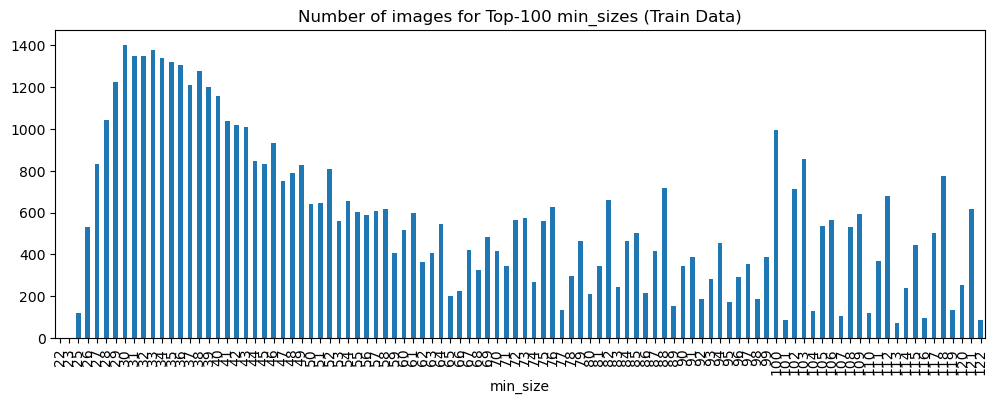

In [108]:
# Plot with number of images for Top-100 min_sizes
short_train_df = train_images_df['min_size'].value_counts().sort_index().head(100)
short_train_df.plot(kind='bar', figsize=(12, 4), title='Number of images for Top-100 min_sizes (Train Data)')

### 2.2. Test Data

In [51]:
def get_im_size(name, root=url_test):
    '''
    Returns the first two dimensions of the image size
    '''
    img_url = os.path.join(root, name)
    img = mpimg.imread(img_url)
    img_shape = img.shape[:2]
    return img_shape

In [110]:
# test_labels_df['test_shape'] = test_labels_df.Path.apply(get_im_size)
test_labels_df['min_size'] = test_labels_df['test_shape'].apply(lambda x: min(x))
test_labels_df['max_size'] = test_labels_df['test_shape'].apply(lambda x: max(x))
test_labels_df['sum_pixels'] = test_labels_df['test_shape'].apply(lambda x: x[0] * x[1])
test_labels_df.head()

,ClassId,Path,test_shape,min_shape,max_shape,sum_pixels,min_size,max_size
0,184,184_1_1.png,"(166, 98)",98,166,16268,98,166
1,178,178_6_13.png,"(479, 308)",308,479,147532,308,479
2,61,61_3_18.png,"(246, 252)",246,252,61992,246,252
3,96,96_7_20.png,"(169, 187)",169,187,31603,169,187
4,119,119_1_29.png,"(195, 192)",192,195,37440,192,195


<Axes: title={'center': 'Number of images for Top-100 min_sizes (Test Data)'}, xlabel='min_size'>

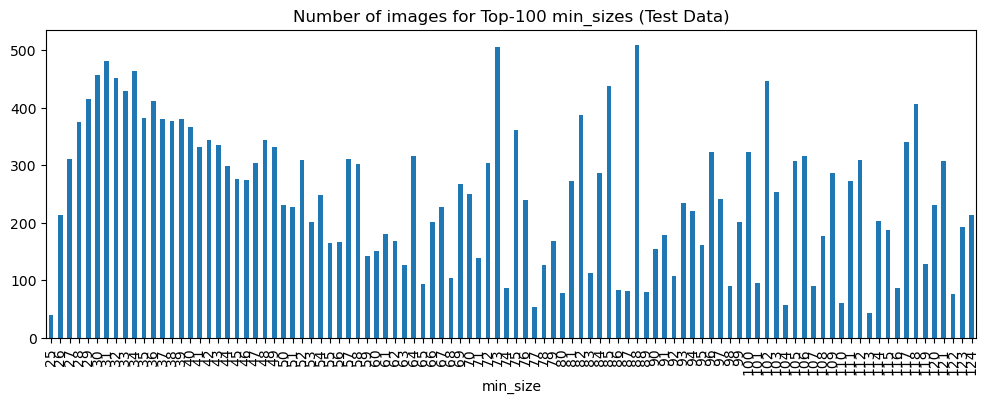

In [111]:
# Plot with number of images for Top-100 min_sizes in Test Data
short_test_df = test_labels_df['min_size'].value_counts().sort_index().head(100)
short_test_df.plot(kind='bar', figsize=(12, 4), title='Number of images for Top-100 min_sizes (Test Data)')

#### According to the both charts above, we can choose the most popular minimum size - 32 pixels.

## 3. Image visualization

In [3]:
def show_images(url, n_rows=2, n_cols=5):
    images_list = os.listdir(url)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 6*n_rows))
    i, j = 0, 0
    print(f'First {n_rows*n_cols} images (in {url}):')
    for pic in images_list[:n_rows*n_cols]:
        address = os.path.join(url, pic)
        print(address)
        img = mpimg.imread(address)
        axes[j][i].imshow(img)
        axes[j][i].set_title(pic)
        i += 1
        j += i // n_cols
        i %= n_cols
    plt.figure(figsize=(10, 16))
    plt.show()

[(900, 1), (2499, 1), (2704, 1), (3480, 1), (4284, 1), (6720, 1), (2025, 1), (2300, 1), (2650, 1), (3363, 1), (3658, 1), (4480, 1), (4690, 1), (868, 1), (2805, 1), (4402, 1), (4410, 1), (5184, 1), (6885, 1), (7812, 1), (9504, 1), (2600, 1), (4347, 1), (6156, 1), (7138, 1), (1764, 1), (2304, 1), (3024, 1), (3540, 1), (4970, 1), (5475, 1), (676, 1), (957, 1), (1020, 1), (1120, 1), (1517, 1), (1804, 1), (1890, 1), (2350, 1), (3304, 1), (2208, 1), (2652, 1), (3306, 1), (3906, 1), (4288, 1), (5396, 1), (6232, 1), (8439, 1), (10584, 1), (1716, 1), (1800, 1), (1748, 1), (1440, 1), (1634, 1), (1677, 1), (1845, 1), (2068, 1), (2112, 1), (2346, 1), (2646, 1), (2800, 1), (3074, 1), (3990, 1), (2256, 1), (2912, 1), (3132, 1), (1892, 1), (2703, 1), (3420, 1), (4216, 1), (5325, 1), (6723, 1), (7387, 1), (1521, 1), (3136, 1), (3481, 1), (4221, 1), (3025, 1), (2597, 1), (2915, 1), (1599, 2), (1848, 2), (2808, 2), (3717, 2), (4896, 2), (1444, 2), (1978, 2), (2024, 2), (2548, 2), (6080, 2), (1258, 2), (

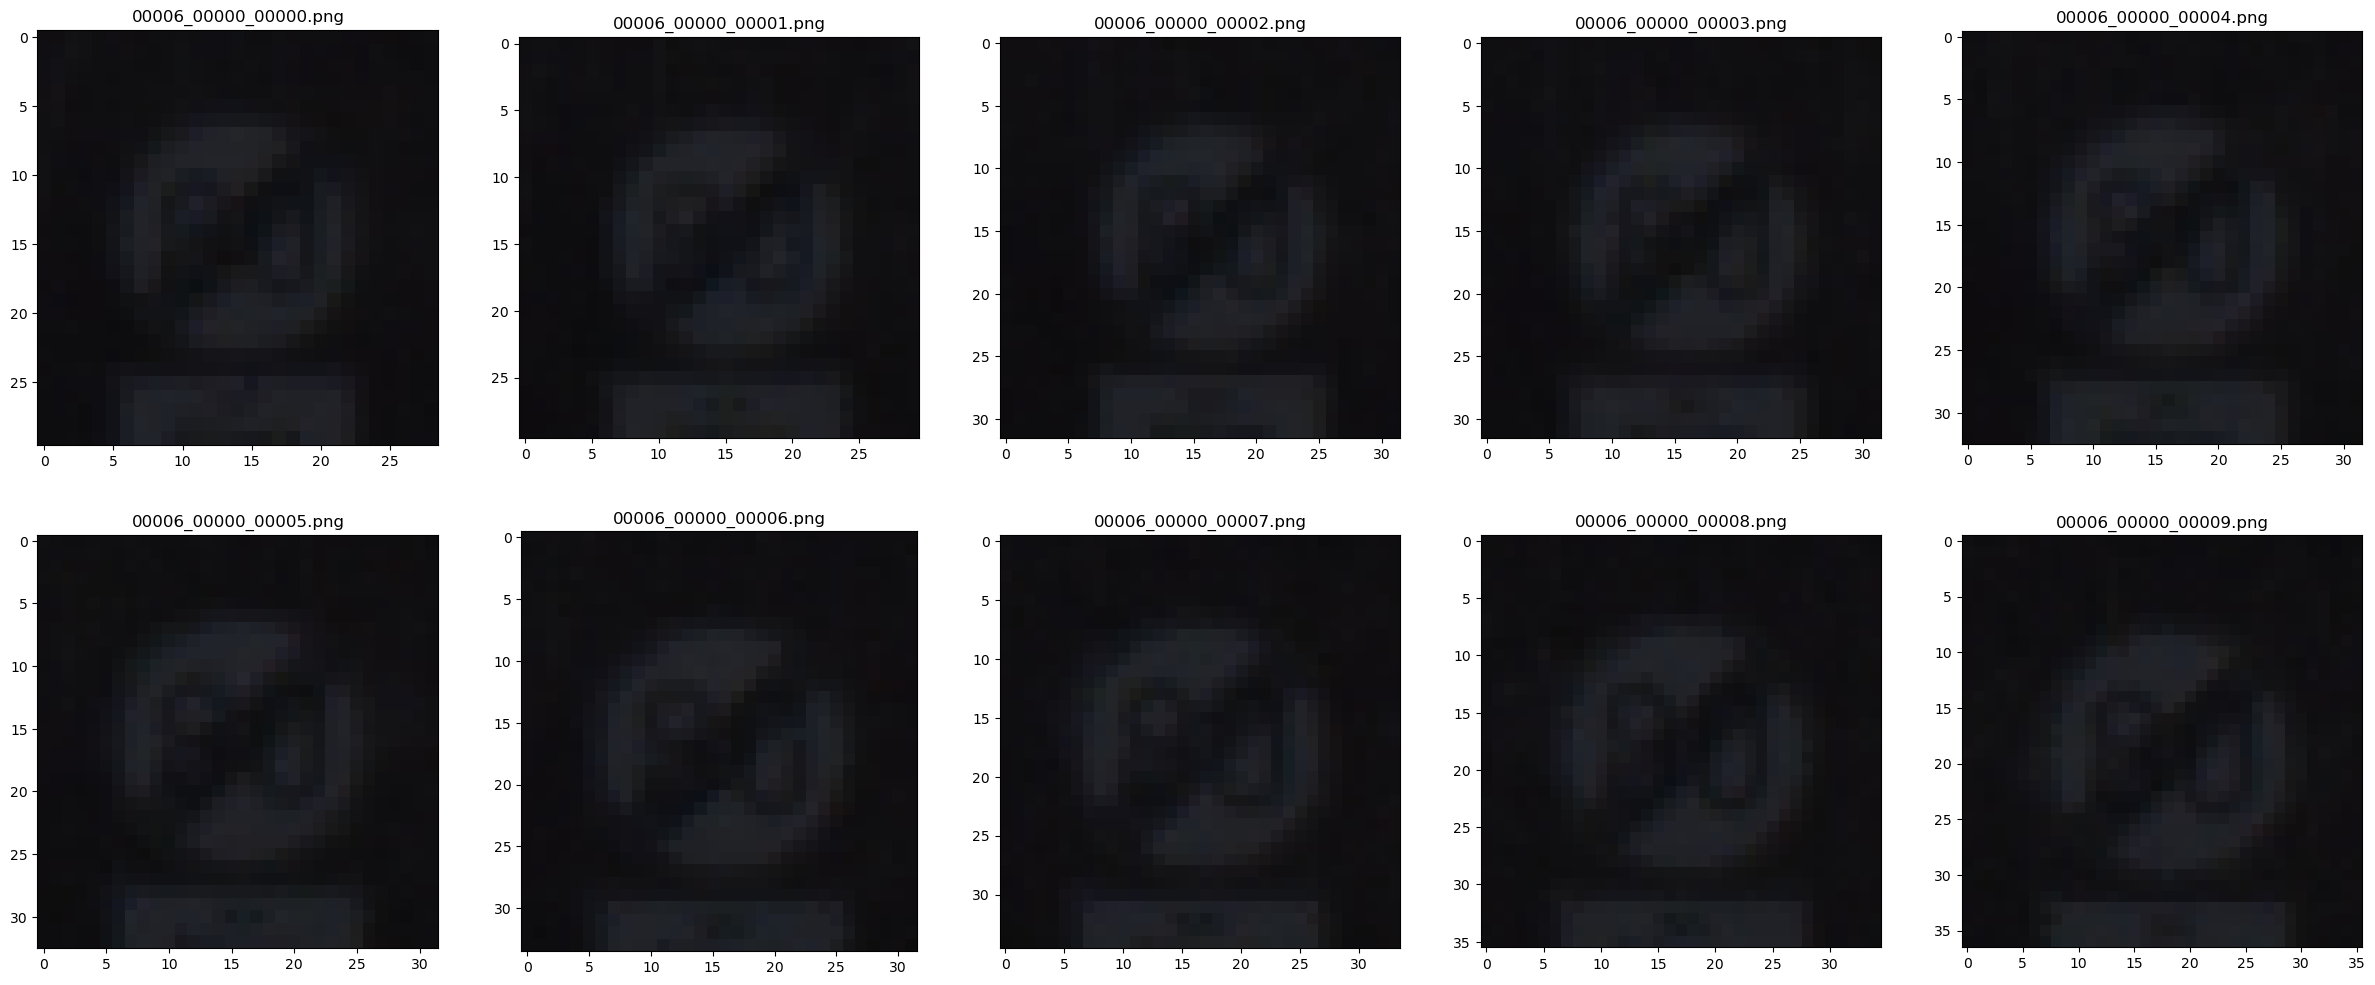

<Figure size 1000x1600 with 0 Axes>

In [4]:
url_train_0 = r'E:\DataSets\Traffic Sign\Traffic_Sign - 205 classes (GTSRB+162 custom classes)\Train\6'
size_dict = dict()
width_dict = dict()
heigth_dict = dict()

for img_name in os.listdir(url_train_0):
    img = mpimg.imread(os.path.join(url_train_0, img_name))

    pixels = img.shape[0] * img.shape[1]
    size_dict[pixels] = size_dict.get(pixels, 0) + 1

    # width_dict[img.shape[0]] = width_dict.get(img.shape[0], 0) + 1
    # heigth_dict[img.shape[1]] = heigth_dict.get(img.shape[1], 0) + 1

print(sorted(size_dict.items(), key=lambda x: x[1]))

# df_w = pd.DataFrame(list(width_dict.values()), columns=['width'], index=[list(width_dict.keys())])
# df_h = pd.DataFrame(list(heigth_dict.values()), columns=['height'], index=[list(heigth_dict.keys())])
# df = df_w.join(df_h, how='outer')
# print(df.head(35))

show_images(url_train_0)